<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- **Profesores:** Ignacio Meza, Sebastián Tinoco
- **Auxiliares:** Catherine Benavides, Consuelo Rojas
- **Ayudante:** Nicolás Ojeda, Eduardo Moya

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno: **Tomás Abedrapo**

### **Link de repositorio de GitHub:** `https://github.com/t-abedrapo/Laboratorio8_REP.git`

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [1]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# **Forecasting (3.0 puntos)**


## **Prophet, teoria**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **Prophet, práctica**

<center>
<img src ="https://static.wikia.nocookie.net/31minutos/images/d/d1/Don_Sergio.png/revision/latest?cb=20190926222900" width = 250 />

Don Sergio quiere entrenar para participar en la maratón y como sabe que correr una maratón requiere de entrenamiento y una dieta balanceada.

Por ello, necesita empezar a comer más balanceado, pero también necesita saber que tanto le va a costar esto, de manera de poder agregarlo a su presupuesto.

Es así como ustedes tendrán que ayudar a Don Sergio a cumplir su sueño de correr la maratón de Santiago, manteniendo su economía del hogar que comparte con su espora Emerilda.

**Datos**

Para poder ayudar a Don Sergio, harán uso del dataset `fruit_vegetables.csv`que contiente las siguientes columnas:

*   `SN:` Serial Number.
*   `Commodity:` Nombre de las frutas o verduras.
* `Date:` Fecha del registro.
* `Unit:` Unidad del precio.
* `Minumum:` Precio mínimo de venta.
* `Maximum:` Precio máximo de venta.
* `Average:` Precio promedio de venta.




In [1]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


### **1. Serie de Tiempo**


#### **1.1 Pre-procesamiento**

Tareas de la sección:


1.   Identificar elementos necesarios para generar la serie de tiempo.
2.   Gráficar datos.
3.   Ver la existencia de tendencias, estacionalidades o ruido.
4.   Dividir datos para tener set de entrenamiento (80%) y testeo (20%). Graficar.

---





**Comida de Don Sergio**

Don Sergio quiere nutricer lo mejor posible durante su tiempo de entrenamiento, por lo que necesita agregar más frutas y verduras a su dieta. Es por ello que decidío añadir los siguientes elementos a su compra diaria.

*   Tomates
*   Lechuga
*   Manzana
*   Plantanos
*   Tofu

**Nota:** Don Sergio prefiere comprar productos locales, compra un Kg diario de cada cosa y a precio promedio.

**Respuesta:**

In [2]:
# Leer el dataset
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/FCFM/Eléctrica Sem7/MDS7202 Laboratorio de Programación/Laboratorios MDS7202/Lab8 MDS7202/datos_lab8/fruit_vegetables.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head(10)

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0
5,5,Carrot(Local),2013-06-16,Kg,30.0,35.0,32.5
6,6,Cabbage(Local),2013-06-16,Kg,6.0,10.0,8.0
7,7,Cauli Local,2013-06-16,Kg,30.0,35.0,32.5
8,8,Raddish Red,2013-06-16,Kg,35.0,40.0,37.5
9,9,Raddish White(Local),2013-06-16,Kg,25.0,30.0,27.5


In [3]:
print(f'Dimensiones del dataset:\t{df.shape}')

Dimensiones del dataset:	(197161, 7)


In [4]:
# Crear máscara con elementos de búsqueda y seleccionar
products = ['Tomato Small(Local)','Lettuce','Apple(Jholey)','Banana' , 'Tofu']
df_sergio = df[df['Commodity'].apply(lambda x: any(product in x for product in products))]
df_sergio.head(15)

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
40,40,Lettuce,2013-06-16,Kg,55.0,60.0,57.5
48,48,Tofu,2013-06-16,Kg,55.0,60.0,57.5
50,50,Apple(Jholey),2013-06-16,Kg,100.0,120.0,110.0
51,51,Banana,2013-06-16,Doz,70.0,80.0,75.0
75,75,Tomato Small(Local),2013-06-17,Kg,20.0,25.0,22.5
113,113,Lettuce,2013-06-17,Kg,45.0,50.0,47.5
121,121,Tofu,2013-06-17,Kg,55.0,60.0,57.5
123,123,Apple(Jholey),2013-06-17,Kg,110.0,130.0,120.0
124,124,Banana,2013-06-17,Doz,70.0,80.0,75.0


In [5]:
# Agrupar por fecha en la columna average y sumar, obtener serie de tiempo
serie = df_sergio.groupby('Date')['Average'].sum()#.reset_index()
df_serie = serie.reset_index()
df_serie.head()

,Date,Average
0,2013-06-16,329.0
1,2013-06-17,322.5
2,2013-06-18,309.0
3,2013-06-19,331.0
4,2013-06-20,319.0


In [6]:
# Graficar serie de tiempo
import plotly.express as px

# plot
fig = px.scatter(df_serie, x = df_serie.Date, y='Average', title='Gasto en vegetales promedio por dia')
fig.show()

In [7]:
# Realizar descomposición de la señal, utilizado seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

desc = seasonal_decompose(serie, model='additive', period=365)


In [8]:
# Realizar Hold Out de 70/30
import numpy as np

train_size = 0.7

n_limit = int(len(df_serie['Date'])*train_size)
time_limit = df_serie['Date'][n_limit]

df_serie['set'] = np.where(df_serie.Date >= time_limit, 'test', 'train')

#### **1.2 Modelo Prophet**

A continuación se genera un modelo Prophet para la predicción. Para ello se tiene que:
1. Crear dataset, donde columna de tiempo tiene que ir en formate YYYY-MM-DD con el nombre de `ds` y columna objetivo con nombre `y`.
2. Entrenar modelo.
3. Generar predicción. Notar que el dataframe de predicción solo contiene una columna con nombre `ds`, al inicio.

In [9]:
#instalamos prophet
!pip install prophet

In [10]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


**1. Generar dataframes de entrenamiento y testeo**

In [11]:
# Respuesta

df_train = df_serie[df_serie['set'] == 'train'].copy()
df_train = df_train.drop(columns = ['set'])
df_train.columns = ['ds' , 'y']

df_test = df_serie[df_serie['set'] == 'test'].copy()
df_test = df_test.drop(columns = ['set'])
df_test.columns = ['ds' , 'y']

print(f'Tamaño train:\t{len(df_train)}')
print(f'Tamaño test:\t{len(df_test)}')

Tamaño train:	1925
Tamaño test:	826


**2. Modelo y entrenamiento**

In [12]:
# Respuesta, tal vez si menciono más arriba que prophet usar la sintaxis de sklearn esto lo hacen solitos nomas
model = Prophet()
model.fit(df_train)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0snmy03u/8tess1e1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0snmy03u/4m22h_by.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12671', 'data', 'file=/tmp/tmp0snmy03u/8tess1e1.json', 'init=/tmp/tmp0snmy03u/4m22h_by.json', 'output', 'file=/tmp/tmp0snmy03u/prophet_modelikhcwq1s/prophet_model-20240526201459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:14:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:14:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**3. Predicción.**

¿Qué muestra el dataframe de predicción una vez realizada la predicción? ¿Qué siginifican las distintas columnas?

In [13]:
# Respuesta
future = model.make_future_dataframe(periods=len(df_test))
forecast = model.predict(future)

**Gráficos de resultados**


Ahora, vemos el resultado de la predicción hecha a través de los gráficos que vienen implementados en la libreria.

Se tienen gráficos de la predicción del modelo y descomposición por componentes.

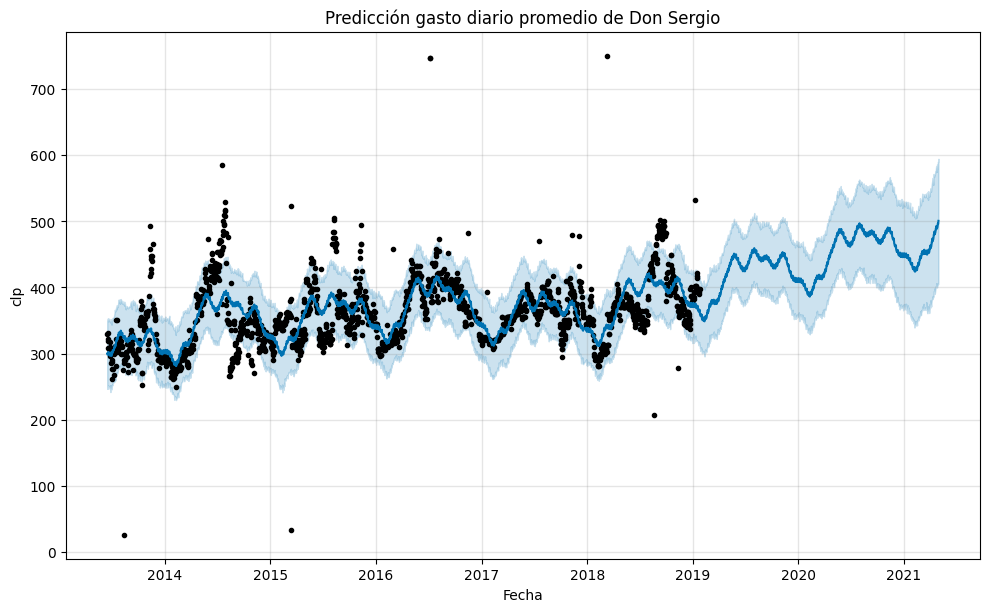

In [14]:
import matplotlib.pyplot as plt
# plot forecast, estático.
#f, ax = plt.subplot(1)
#f.set_figheight(5)
#f.set_figwidth(15)
fig = model.plot(forecast)
plt.xlabel('Fecha')
plt.ylabel('clp')
plt.title('Predicción gasto diario promedio de Don Sergio')
plt.show()

#### **1.3 Resultados y métricas**

En la presente sección se van a ver los resultados de la predicción, comparando con los resultados originales, así se obtienen métricas de error. Para ello se hacen los siguientes pasos:
1. Inspeccionar gráfica de predicción con los datos reales. Agregar tres vistas: predicción del primer 15% de los datos, 50% de los datos y 100% de la predicción.
2. Calcular métricas de error (RMSE, MAE, MAPE).

In [15]:
# Respuesta
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(df_serie['Average'], forecast['yhat'], squared=False)
mae = mean_absolute_error(df_serie['Average'], forecast['yhat'])
mape = np.mean(np.abs((df_serie['Average'] - forecast['yhat']) / df_serie['Average'])) * 100

print(f"RMSE:\t{rmse}")
print(f"MAE:\t{mae}")
print(f"MAPE:\t{mape} %")

RMSE:	66.69263553790331
MAE:	39.76286603811201
MAPE:	13.623466723873609 %


#### **1.4 Festividades y fechas importantes**

Como a todos, a Don Sergio también le afectan las fechas importantes. Para ver como afectan estas fechas al presupuesto de Don Sergio tiene que realizar las siguientes tareas:

1. Crear dataframe con fechas importantes y agregar las al modelo con el argumento `holiday`.
2. Predecir las el dataframe de testeo
3. Comparar resultados. Hacer una tabla con resultados RMSE, MAE, MAPE anteriores y al añadir las festividades.


**1. Festividades y agregar a modelo**

In [16]:
!pip install holidays

In [17]:
# Respuestas
import holidays

año_inicial = df_serie['Date'].min().year
año_final =   df_serie['Date'].max().year
años = list(range(año_inicial,año_final+1))

holidays = pd.to_datetime(list(holidays.Chile(years=años)))

df_serie['holiday'] = df_serie['Date'].isin(holidays)

df_serie.head()

,Date,Average,set,holiday
0,2013-06-16,329.0,train,False
1,2013-06-17,322.5,train,False
2,2013-06-18,309.0,train,False
3,2013-06-19,331.0,train,False
4,2013-06-20,319.0,train,False


**2. Predecir**

(no queda claro enunciado: "2. Predecir las el dataframe de testeo")

**3. Resultados**

¿Son más precisas las predicciones? ¿Qué otro festividad podría afectar a los precios de las frutas y verduras?

#### **1.5 Regresores adicionales**


Don Sergio sabe que la fruta y la verdura tiene temporadas y que por eso hay fechas en que hay ciertas cosas más caras que otras. Además, sabe que este tipo de alimentos sube de precio en invierno, por lo que necesita que tenga en cuenta estas fechas.


---
 Para lograr lo anterior tendrán que:
 1. Crear regresor con 1 y 0's según corresponda, para las fechas de invierno. Tomar invierno desde el 21/junio hasta el 21/septiembre de todos los años.
 2. Agregar columna con el regresor tanto al dataframe original como al de testeo
 3. Entrenar y predecir. Gráficar resultados.

In [ ]:
# Respuesta

# **Sistemas de Recomendación (3.0 puntos)**

<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Shopping_online_with_bank_card.jpg/1024px-Shopping_online_with_bank_card.jpg" / width = 350>

Como no todo en la vida es correr y nutrirse, don Sergio desarrollo el hábito de comprar online y pasa horas y horas en Amazon viendo distintos objetos que le podrían servir, pero no sabe qué comprar, por lo que usted tendrá que ayudarlo a buscar los elementos más comprados por sus amigos para que él también pueda probarlos.

---

Las tareas a realizar son:

1. Limpiar y explorar el dataset.
2. Recomendación por Ranking (baseline).
3. Recomendación basada en filtros colaborativos por usuarios.
4. Recomendaciones basadas en filtros colaborativos por items.



In [18]:
# se instala surprise library
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357246 sha256=2f30a842b68fd65d0507506448ac0e9f4c8aef97c45fec1b668ef648dd2997c6
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [19]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD

import pandas as pd
from copy import deepcopy

Los datos presentan las siguientes columnas:
* `iderId`: ID único de cada usuario
* `productId:` ID único de cada producto
* `Rating:` Rating que un usuario le dio a un producto
* `timestamp:` Fecha del rating

In [40]:

direccion = '/content/drive/MyDrive/FCFM/Eléctrica Sem7/MDS7202 Laboratorio de Programación/Laboratorios MDS7202/Lab8 MDS7202/datos_lab8/ratings_Electronics.parquet'

df = pd.read_parquet(direccion)

print(df.shape)
df.head()

(164007, 3)


,user_id,prod_id,rating
189,3188,0,5.0
200,4980,0,4.0
314,5374,0,5.0
389,6293,0,5.0
406,4879,0,3.0


### **2.1.2 EDA (0.5 puntos)**

Habiendo limpiado los datos, generemos un pequeño análisis exploratorio:

Reportar la cantidad de usuarios y productos únicos:

In [21]:
# Respuesta

users = df['user_id'].unique()
products = df['prod_id'].unique()


print(f'Cantidad de usuarios:\t{len(users)}')
print(f'Cantidad de productos:\t{len(products)}')

Cantidad de usuarios:	8014
Cantidad de productos:	6727


Verificar que no hayan valores nulos

In [22]:
# Respuesta
df.isnull().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

Graficar distribución de los ratings

In [23]:
# Respuesta
fig = px.histogram(df, x='rating', title='Distribución de ratings')
fig.show()

Reportar las siguientes listas:

- Top 5 de usuarios con mayores interacciones
- Top 5 de productos con mayores inteacciones

In [24]:
# Respuesta: Realizamos agregaciones de count
user_count = (df.groupby('user_id').count())['rating'].sort_values(ascending=False)
prod_count = (df.groupby('prod_id').count())['rating'].sort_values(ascending=False)

print('\nUsuarios con mas interacciones:\n')
print(user_count.head(5))

print('\nProductos con mas interacciones:\n')
print(prod_count.head(5))



Usuarios con mas interacciones:

user_id
6703    283
5732    217
6273    206
1414    199
4665    179
Name: rating, dtype: int64

Productos con mas interacciones:

prod_id
5130    611
2843    542
5244    395
2525    371
6290    362
Name: rating, dtype: int64


A partir de sus respuestas, escriba al menos 3 conclusiones.

Escriba sus observaciones aquí:

1. Los usuarios tienden a otorgar puntuaciones altas a los productos. Claramente no hay una distribución normal del rating.
2. No esta equilibrada la cantidad de reseñas por usuario, existiendo usuarios que han dado muchas mas opiniones de productos que otros.
3. Existen productos altamente reseñados en comparación a otros, existiendo un desbalance en estos datos.

## **2.2 Holdout**

Con los datos procesados, separe los datos de entrenamiento en train y test asignando 30% de los datos para el conjunto de test. Para replicabilidad de sus respuestas, fije la semilla en `42`.

In [25]:
reader = Reader(rating_scale=(0,5))

df_collaborative = df[['user_id', 'prod_id', 'rating']].copy() # ordenamos dataset en user, producto, rating (paso clave para trabajar con Surprise)
dataset = Dataset.load_from_df(df_collaborative, reader) # generamos Dataset de Surprise


In [26]:
from surprise.model_selection import train_test_split

re = 42
test_size = 0.3
train, test = train_test_split(dataset, test_size=test_size, random_state=re)


## **2.3 Baseline**

El objetivo de esta sección es generar un *baseline* en las recomendaciones a partir de una aproximación *dummy* para resolver el problema de recomendación. En particular, se le pide lo siguiente:
- Entrenar modelo baseline `NormalPredictor` de `surprise` con los datos de entrenamiento
- Generar predicciones usando el modelo entrenado
- Evaluar predicciones usando el error cuadrático medio. Entregue una interpretación de su resultado

In [27]:
from surprise.prediction_algorithms.random_pred import NormalPredictor

model = NormalPredictor()
model.fit(train)

pred = model.test(test)

In [28]:
from surprise import accuracy

mae = accuracy.mae(pred)


MAE:  0.9929


## **Filtros Colaborativos Basados en Memoria**

A modo de mejorar esta sección, se le pide que implementar filtros colaborativos basados en memoria por medio de algoritmos basados en KNN. En específico, se le pide implementar:
- Filtro Colaborativo KNN enfocado en el Usuario
- Filtro Colaborativo KNN enfocado en el Producto
- Use `KNNBasic` y similitud coseno para ambos modelos

Luego **para cada uno de los modelos**, responda:

- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Qué enfoque tienen un mejor rendimiento? ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

*Hint: Le podría servir apoyarse de esta [documentación](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration).*

In [29]:
def get_user_top_k(predictions, user, k = 10):

  # predecir los rating filtrados por usuario user
  predicted_ratings = [pred.est for pred in predictions if pred.uid == user]

  # Ordenar las predicciones
  sorted_predicted_ratings = sorted(predicted_ratings , reverse=True)

  return sorted_predicted_ratings[:k]

In [30]:
from surprise.accuracy import mse
from surprise import KNNBasic

# entrenar algoritmo

sim_options = {'name': 'cosine',
               'user_based': True}

# algoritmo base a usuario.
user_model = KNNBasic(sim_options=sim_options)

# entrenar
user_model.fit(train)

#predecir en dataframe de testeo

#predictions =  # retornar un dataframe con el rating estimado para cada (user_id, item_id)
predictions = user_model.test(test)

# obtener mse

MSE = mse(predictions)
print(f'MSE:\t{MSE}')

Computing the cosine similarity matrix...
Done computing similarity matrix.
MSE: 1.2122
MSE:	1.212159526775385


In [31]:
# ejemplo
example = [(3, 3906, None)]
print(user_model.test(example))
get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=3.381966011250105, details={'actual_k': 3, 'was_impossible': False})]


[5, 4.799755049750801, 4.399861310283875, 4.333333333333333, 4.199459547276517]

In [34]:
# entrenar algoritmo base a items, obtener MSE

sim_options = {'name': 'cosine',
               'user_based': False}

# algoritmo base a items.

item_model = KNNBasic(sim_options=sim_options)

# entrenar
item_model.fit(train)

#predecir en dataframe de testeo

predictions = item_model.test(test)

# obtener mse
MSE = mse(predictions)
print(f'MSE:\t{MSE}')

Computing the cosine similarity matrix...
Done computing similarity matrix.
MSE: 1.2328
MSE:	1.23280223807978


In [35]:
example = [(3, 3906, None)]
print(item_model.test(example))

get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=2.5, details={'actual_k': 4, 'was_impossible': False})]


[5, 5, 5, 4.857142857142857, 4.856937449847549]

## **Filtros Colaborativos Basados en Modelo**

Finalmente, se le pide implementar el modelo `SVD` para resolver el problema. Al igual que en las secciones anteriores, entrene este modelo y luego evalúe sus predicciones en el conjunto de test. Luego, responda:

- ¿En qué se diferencia este tipo de modelos de los modelos basados en memoria?
- ¿Qué significa el parámetro `num_factors`? ¿De qué manera podría impactar en el ajuste del modelo?
- ¿Qué indican los parámetros $\mu$, $b_u$, $b_i$? ¿Qué cuidado se debe tener al utilizarlos?
- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

**R:**


- Estos modelos realizan una reducción de dimensionalidad de los datos, asi encontrando patrones para realizar las predicciones. Esto da mas eficiencia al modelo, sobre todo cuando tenemos muchos datos.

- num_factors corresponde al número de factores utilizados para la represrntación de datos del modelo.

- mu corresponde a media y b a sesgos.



In [36]:
#pred
pred_r = model.predict(3, 3906).est
pred_r

4.137600398134057

In [41]:
#real
df[(df['user_id']==3) & (df['prod_id']==3906)]

,user_id,prod_id,rating


In [42]:
get_user_top_k(predictions, user = 2170, k = 5)

[5, 5, 5, 4.857142857142857, 4.856937449847549]

In [44]:
(df[df['user_id']==2170]).sort_values(by='rating',ascending=False).head(5)

,user_id,prod_id,rating
4282304,2170,3732,5.0
3677315,2170,3177,5.0
6673655,2170,5668,5.0
6541637,2170,5560,5.0
6513100,2170,5544,5.0


la predicción acierta que el usuario da 3 ratinf de 5. Para los otros dos la predicción falla por 0.15 aprox.

In [36]:
# Respuesta

model = SVD(random_state=re)

model.fit(train)

predictions = model.test(test)

In [37]:
# calcular mae
from surprise.accuracy import mae
mae(predictions)

MAE:  0.6935


0.6935299083492904

###**Comentarios Finales**

* ¿Qué sistema de recomendación presenta mejores métricas? ¿A qué se podría deber esto?
* ¿Es posible mejorar sus resultados? Si es así, proponga al menos 2 mejoras.

- KNN, este es modelo basado en memoria. Para grandes cantidades de datos el tiempo de aprendizaje puede empeorar considerablemente, por lo que, dependiendo del problema, podría ser mas óptimo considerar SVD.

- Se podría realizar un grid search para obtener los mejores parámetros posibles a la hora de definir los modelos. Esto podría mejorar efectividad de modelos.